<a href="https://colab.research.google.com/github/GladwelWanjau/Week-9-Moringa-School-DataScience-Independent-Project/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the survival rate of passangers

> Indented block



# Specifying the analysis question
>To utilize K Nearest Neighbour Machine Learning Technique in predicting passengers who will survive an accident and those who won't


# Metrics for Success
1.Identify which measurements are most important in identifying the survival of passengers.
2.A high accuracy and roc_auc score 80% and above

# Understanding the Context
The data used in this project is covers aspects that come into in an aeroplane accident.

# Experimental design.
1. Data loading
2. Detecting and handling of missing values.
3. Type conversion.
4. Outlier detection.
5. Splitting data
6. Modelling using KNN
7. Hyperparameter tuning 
8. Feature importance ranking
9. Results and conclusion.
10. Challenging the solution

# Reading and Cleaning the data

In [10]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [11]:
df = pd.read_csv('train (5).csv')
df.sample(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S


In [12]:
# Determining the no. of records in our dataset
#
print( df.shape[0])

891


In [13]:
# Previewing the top of our dataset
#
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Previewing the bottom of our dataset
#
display(df.tail())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
df.Survived.unique()

array([0, 1])

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Boxplots')

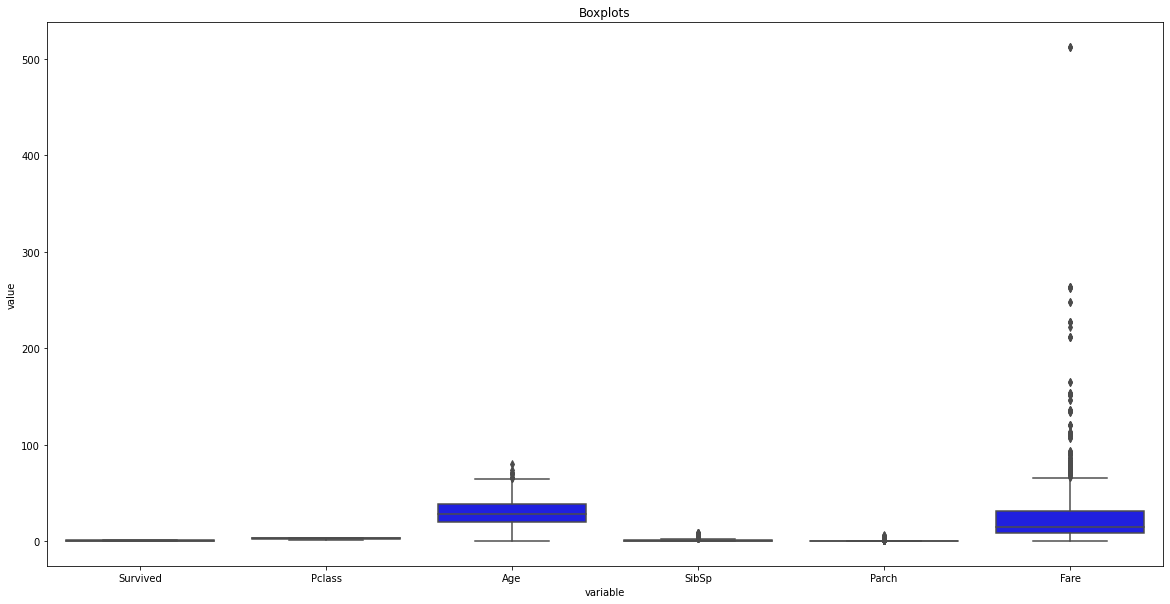

In [18]:
# Checking for Outliers
#
import seaborn as sns
import matplotlib.pyplot as plt

boxplot = pd.DataFrame(data = df, columns = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare'])

plt.figure(figsize=(20,10))

sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')

In [19]:
# Checking for Anomalies
#
Q1= df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             20.1250
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64
----------------------------------------


'0.5 quartile'

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [20]:
# Check for missing values 
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
#77.10% of observations in the Cabin column are missing hence we will drop it.
#19.87% of observations in the age column are missing.

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [21]:
# Drop Name, Cabin and Ticket columns
df.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)

In [22]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [23]:
#Finding the unique values in every column
for column in df.columns:
  print(column)

  print(df[column].unique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [50]:
df['Age'].skew()

0.4344880940129925

In [51]:
df['Age'].kurt()

0.9662793026645233

In [53]:
df['Age'].var()

169.05239993721085

# Exploratory Data Analysis

In [24]:
import warnings
warnings.filterwarnings(action='ignore')

In [25]:
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [26]:
!pip install pandas-profiling[notebook,html]

In [30]:
from pandas_profiling import ProfileReport

In [ ]:
# Generate profile report for the data
df_profile = ProfileReport(df)
df_profile

In [32]:
# Determining the distribution of target variable
df['Survived'].value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


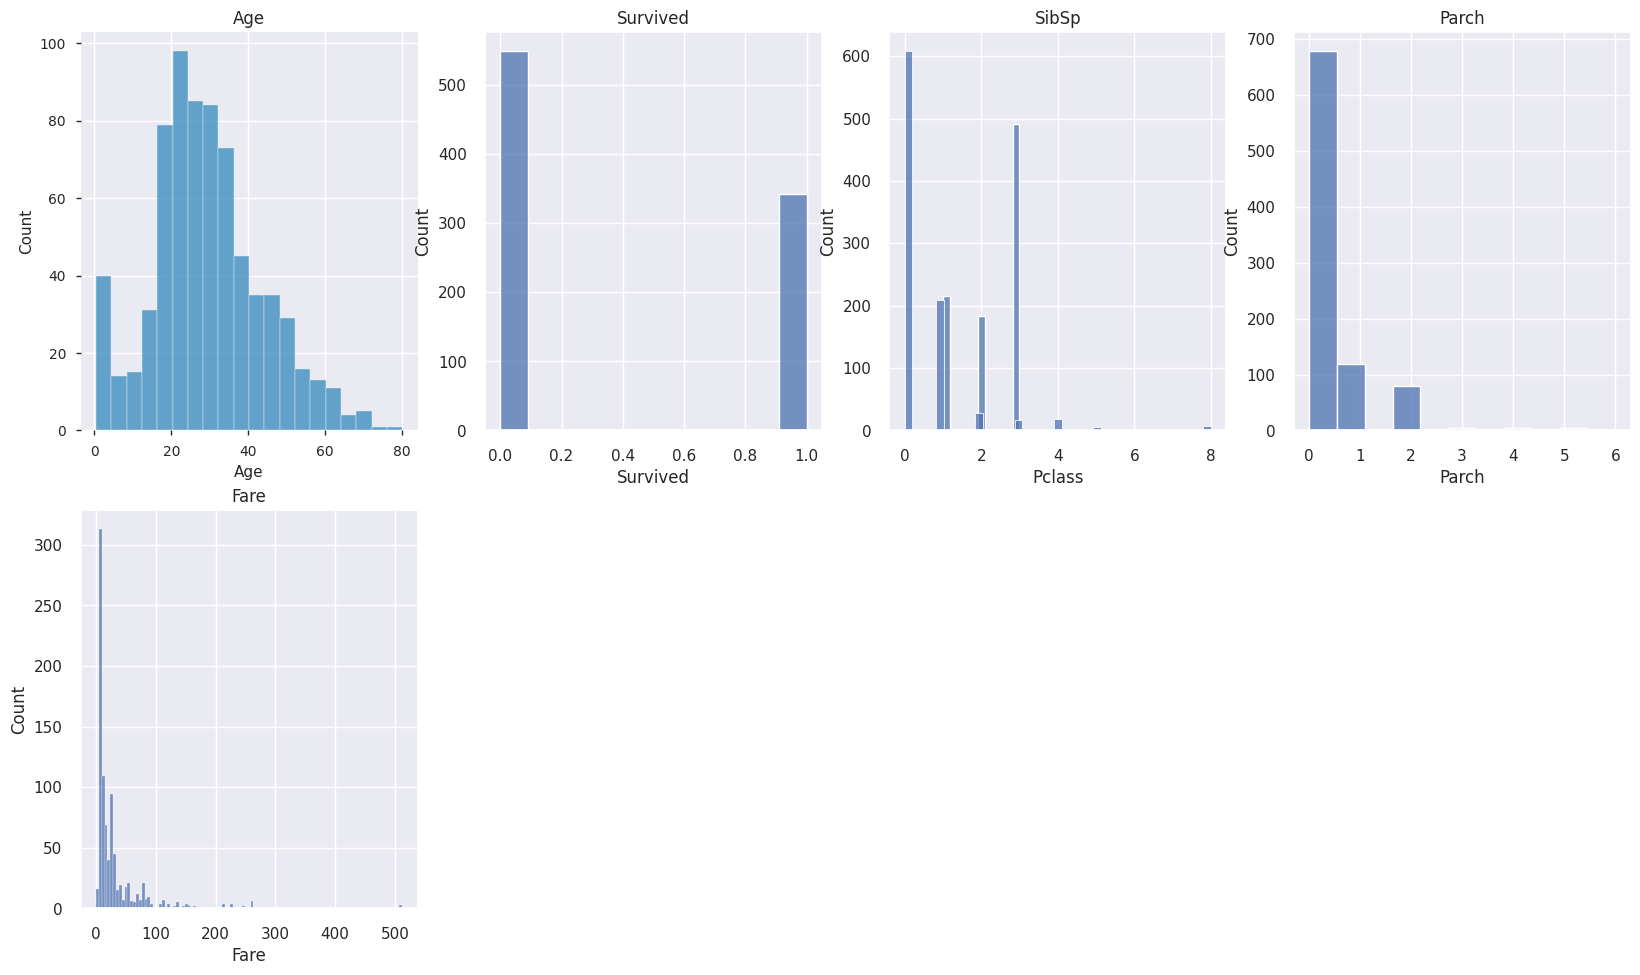

In [35]:
# Viewing the distributions of the variables using histograms
columns_dict={'Age':1, 'Survived':2, 'Pclass':3, 'SibSp':3,'Parch':4,'Fare':5}
plt.figure(figsize=(20,30) )

# make a histogram plot for each variable column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  sns.histplot(df[variable])
  sns.set(style='darkgrid')
  plt.title(variable)
plt.show()

In [36]:
# Fill missing values of the Age column,we will use the mean.
fill_values = {'Age':df.Age.mean()}
df.fillna(fill_values, inplace=True)

In [37]:
#Converting the Sex column to numerical
from sklearn.preprocessing import LabelEncoder
lb_make=LabelEncoder()
df['Sex']=lb_make.fit_transform(df['Sex'])

In [38]:
#Mapping the Embarked column
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [39]:
#Viewing the manipulated data
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0.0
1,2,1,1,0,38.000000,1,0,71.2833,1.0
2,3,1,3,0,26.000000,0,0,7.9250,0.0
3,4,1,1,0,35.000000,1,0,53.1000,0.0
4,5,0,3,1,35.000000,0,0,8.0500,0.0
5,6,0,3,1,29.699118,0,0,8.4583,2.0
6,7,0,1,1,54.000000,0,0,51.8625,0.0
7,8,0,3,1,2.000000,3,1,21.0750,0.0
8,9,1,3,0,27.000000,0,2,11.1333,0.0
9,10,1,2,0,14.000000,1,0,30.0708,1.0


In [40]:
from sklearn.model_selection import train_test_split as tts
X = df.drop(['Survived','PassengerId'], axis=1)
Y = df['Survived']

# Split data
x_train, x_test, y_train, y_test = tts(X, Y, test_size=.8, random_state=0)

In [41]:
df['Survived'].value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

# Implementing the solution

In [42]:
# Implementing the Solution
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
# Initialising the KNeighbours Calssifier 
k_classifier = KNeighborsClassifier(5, weights='uniform' )

# Training the model
k_classifier.fit(x_train, y_train)

# Running the prediction
y_pred = k_classifier.predict(x_test)


In [ ]:
print("Accuracy score : ",  metrics.accuracy_score(y_test, y_pred))

The accuracy of the model is more than 80% hence the model is sufficient but could be improved by increasing the degrees of the KNN.

# Challenging the solution

In [ ]:
# Initialising the KNeighbours Classifier 
#weights='distance'
k_classifier1 = KNeighborsClassifier(5, weights='distance' )

# Training the model
k_classifier1.fit(x_train, y_train)

# Running the prediction
y_pred = k_classifier1.predict(x_test)

In [ ]:
#weights='distance'
print("Accuracy score : ",  metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Initialising the KNeighbours Calssifier 
#Trting different options 
k_classifier2 = KNeighborsClassifier(5, weights='distance', algorithm='ball_tree')

# Training the model
k_classifier2.fit(x_train, y_train)

# Running the prediction
y_pred = k_classifier2.predict(x_test)

In [ ]:
print("Accuracy score : ",  metrics.accuracy_score(y_test, y_pred))

In [ ]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)

#Using weights as the parameter
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']
algorithm_option = ['auto', 'ball_tree', 'kd_tree']
leaf_size_option = list(range(20, 40))

In [ ]:
param_grid = dict(n_neighbors=k_range, weights=weight_options, algorithm=algorithm_option, leaf_size= leaf_size_option )

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.drop('Survived', axis=1)
X = X.values
y = df['Survived'].values

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)


In [ ]:
from sklearn.metrics import  pairwise_distances
def KnnWeights(weight, X,y, k):

  def dist(a,b):
    return np.sum(np.multiply(weight, np.abs(a-b)))
  distMat = pairwise_distances(X, metric=dist)
  kneighbours =np.argsort(distMat, axis=1)[:,1:k+1]
  predicted =np.round(np.sum(y[ kneighbours], axis=1)/k)
  loss = 1-accuracy_score(y,predicted)
  return loss 

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.8, random_state=0)

In [ ]:
from scipy.optimize import minimize 

lweights = minimize(KnnWeights, weight,args=(X1_train, y1_train, k), options={"maxiter" : 10 })


In [ ]:
lweights = lweights.x

# Follow-up Questions

# a) Did we have the right question?
Yes.


# b) Did we have the right data?
Yes. The data available was sufficient for analysis.



# c) What can be done to improve the solution?
Increasing the degrees of the KNN model.